## The Spark Foundation Internship
#### Name: Shubham Patil
### Task-1: Predcition Using Supervised Machine Learning


In [2]:
#import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Read the Data
url="http://bit.ly/w-data"
df=pd.read_csv(url)
df.shape

(25, 2)

In [5]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


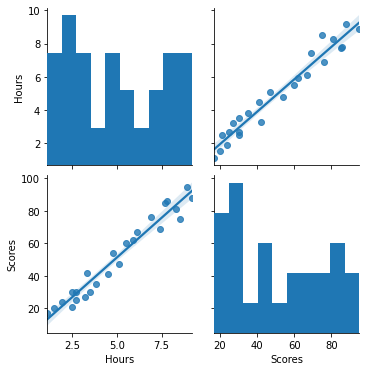

In [8]:
#plot a pairplot to check the relation between variable
sns.pairplot(df,kind="reg",palette="rainbow")

In [9]:
#Above graph and below table indiacates the strong positive correlation
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### Make A Data Ready

In [10]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

### Define Training and Testing Variables by splitting the data

In [13]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=0)

print("Training Variable {}, Testing Variable {}".format(train_x.shape,test_x.shape))

Training Variable (20, 1), Testing Variable (5, 1)


### Linear regression Model

In [12]:
from sklearn.linear_model import LinearRegression
Lreg=LinearRegression()
Lreg.fit(train_x,train_y)

LinearRegression()

In [15]:
L_pred=Lreg.predict(test_x)
L_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

### Compare the Original Values to Predicted Values

In [16]:
df1=pd.DataFrame({"Origal":test_y,"Predicted":L_pred })
df1

,Origal,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [18]:
#Cost Function
from sklearn import metrics
Mean_Abs_Error=metrics.mean_absolute_error(test_y,L_pred)
Mean_Sqaure_Error=metrics.mean_squared_error(test_y,L_pred)
Root_Mean_Sqaure_Error=np.mean(Mean_Sqaure_Error)
print("Mean_Abs_Error:-",Mean_Abs_Error)
print("Mean_Sqaure_Error:-",Mean_Sqaure_Error)
print("Root_Mean_Sqaure_Error:-",Root_Mean_Sqaure_Error)
print("R Sqaure:-",metrics.r2_score(test_y,L_pred))

Mean_Abs_Error:- 4.183859899002975
Mean_Sqaure_Error:- 21.5987693072174
Root_Mean_Sqaure_Error:- 21.5987693072174
R Sqaure:- 0.9454906892105356


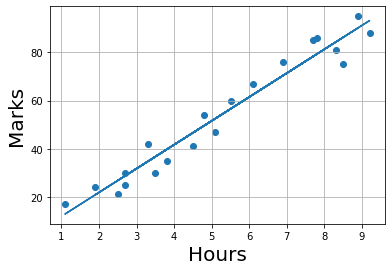

In [25]:
plt.scatter(train_x,train_y)
plt.xlabel("Hours",size="20")
plt.ylabel("Marks",size="20")
plt.plot(train_x,Lreg.predict(train_x))
plt.grid()
plt.show()